# **1. Imports**
---
- Importing libraries
    - Sklearn

In [148]:
# Data manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# **2. Data inspection**
---

In [149]:
df = pd.read_csv("Telco.csv")

In [150]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [151]:
df.drop(['customerID'], axis= 1, inplace= True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [153]:
df['TotalCharges'] = df['TotalCharges'][ df['TotalCharges'] != ' ']

In [154]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

# **2.1 Inspecting for missing values and duplicates**
---


In [155]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [156]:
df.duplicated().sum()

22

In [157]:
df.drop_duplicates(inplace=True)

# **2.2 Checking cardanility and info of the data**
---

In [158]:
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021,7021.000000,7021,7021,7021.000000,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021.000000,7010.000000,7021
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3541,NaN,3619,4911,NaN,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,NaN,NaN,5164
mean,NaN,0.162512,NaN,NaN,32.469449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.851894,2290.353388,NaN
std,NaN,0.368947,NaN,NaN,24.534965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.069001,2266.820832,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.750000,408.312500,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,1403.875000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.900000,3807.837500,NaN


In [159]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7021,2,Male,3541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7021.0,NaN,NaN,NaN,0.162512,0.368947,0.0,0.0,0.0,0.0,1.0
Partner,7021,2,No,3619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7021,2,No,4911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7021.0,NaN,NaN,NaN,32.469449,24.534965,0.0,9.0,29.0,55.0,72.0
PhoneService,7021,2,Yes,6339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7021,3,No,3368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7021,3,Fiber optic,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7021,3,No,3490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7021,3,No,3080,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **EDA**
---

In [160]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=[object]).columns.tolist()

cat_cols = cat_cols[:-1]

In [161]:
cat_cols.insert(0, num_cols[0])


In [162]:
num_cols.pop(0)

'SeniorCitizen'

In [163]:
print(f"category columns :  {cat_cols}")
print(f"Numeric columns  : {num_cols}")

category columns :  ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numeric columns  : ['tenure', 'MonthlyCharges', 'TotalCharges']


(array([1503.,  672.,  512.,  458.,  454.,  316.,  276.,  201.,  194.,
         170.,  179.,  159.,  147.,  162.,  145.,  136.,  159.,  117.,
         121.,  146.,  128.,  108.,  102.,  100.,   83.,   74.,   66.,
          64.,   36.,   22.]),
 array([  18.8       ,  307.66666667,  596.53333333,  885.4       ,
        1174.26666667, 1463.13333333, 1752.        , 2040.86666667,
        2329.73333333, 2618.6       , 2907.46666667, 3196.33333333,
        3485.2       , 3774.06666667, 4062.93333333, 4351.8       ,
        4640.66666667, 4929.53333333, 5218.4       , 5507.26666667,
        5796.13333333, 6085.        , 6373.86666667, 6662.73333333,
        6951.6       , 7240.46666667, 7529.33333333, 7818.2       ,
        8107.06666667, 8395.93333333, 8684.8       ]),
 <BarContainer object of 30 artists>)

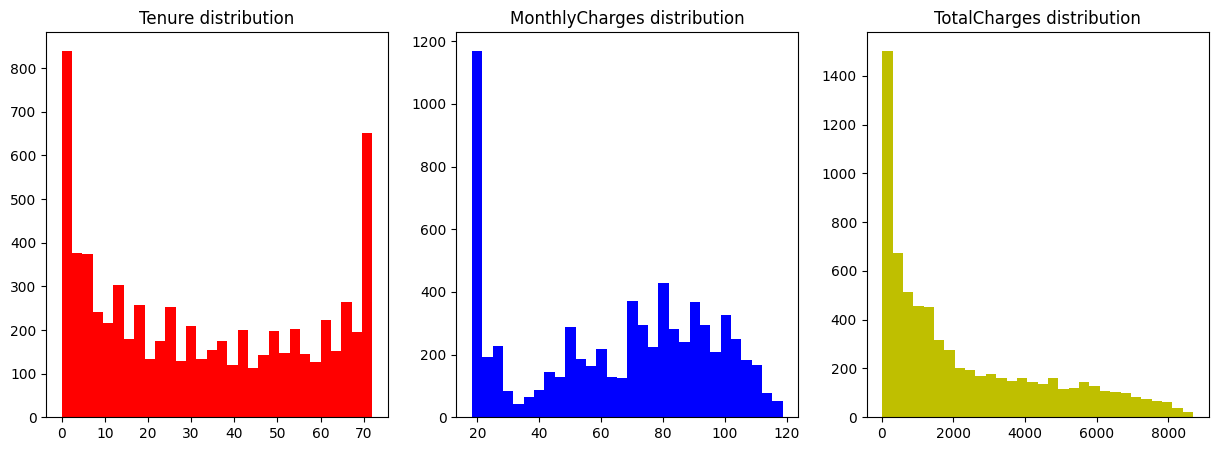

In [164]:
plt.figure(figsize=(15,5))

plt.subplot(1,3, 1)
plt.title("Tenure distribution")
plt.hist(df[num_cols[0]], bins = 30, color= 'r')


plt.subplot(1,3, 2)
plt.title('MonthlyCharges distribution')
plt.hist(df[num_cols[1]], bins = 30, color= 'b')


plt.subplot(1,3, 3)
plt.title('TotalCharges distribution')
plt.hist(df[num_cols[2]], bins = 30, color= 'y')

<Axes: title={'center': 'TotalCharges distribution'}, ylabel='TotalCharges'>

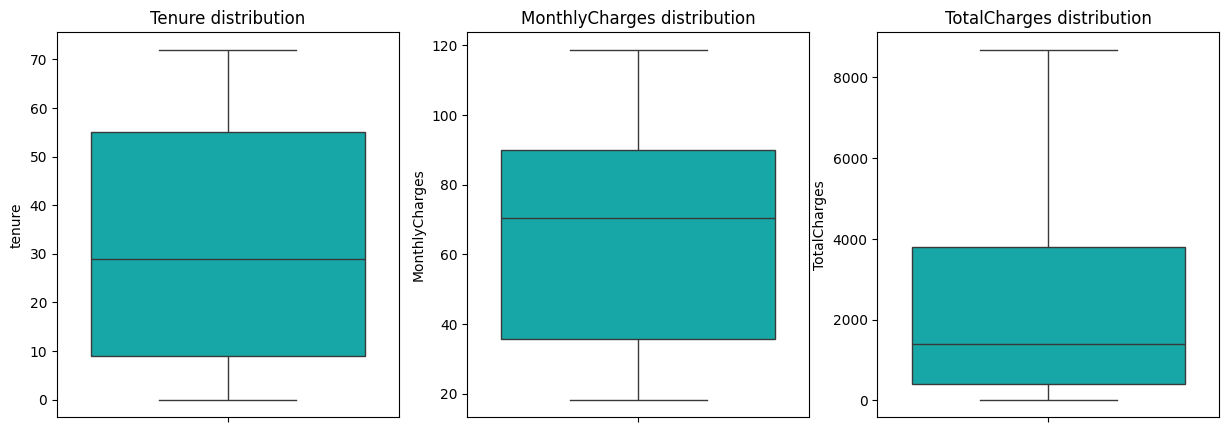

In [165]:
plt.figure(figsize=(15,5))

plt.subplot(1,3, 1)
plt.title("Tenure distribution")
sns.boxplot(df[num_cols[0]],color= 'c')


plt.subplot(1,3, 2)
plt.title('MonthlyCharges distribution')
sns.boxplot(df[num_cols[1]], color= 'c')


plt.subplot(1,3, 3)
plt.title('TotalCharges distribution')
sns.boxplot(df[num_cols[2]], color= 'c')

In [171]:
# Identify outliers in each column with Z-Score.
from scipy import stats

z_scores = np.abs(stats.zscore(df[num_cols]))
z_scores_df = pd.DataFrame(z_scores)

z_scores_df

,tenure,MonthlyCharges,TotalCharges
0,1.282728,1.164135,NaN
1,0.062387,0.262811,NaN
2,1.241967,0.365914,NaN
3,0.510759,0.750058,NaN
4,1.241967,0.194503,NaN
...,...,...,...
7038,0.345224,0.663458,NaN
7039,1.611307,1.275428,NaN
7040,0.875118,1.172450,NaN
7041,1.160445,0.317562,NaN


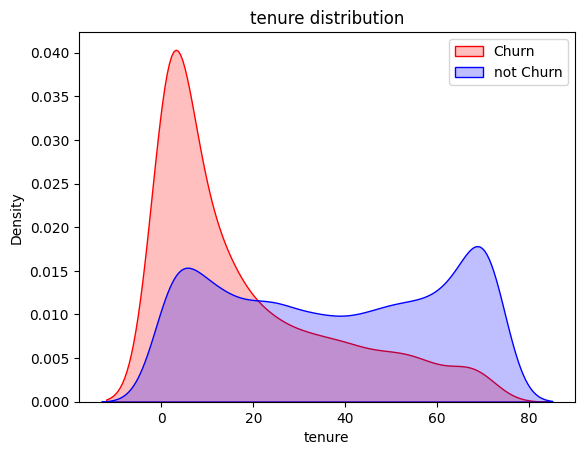

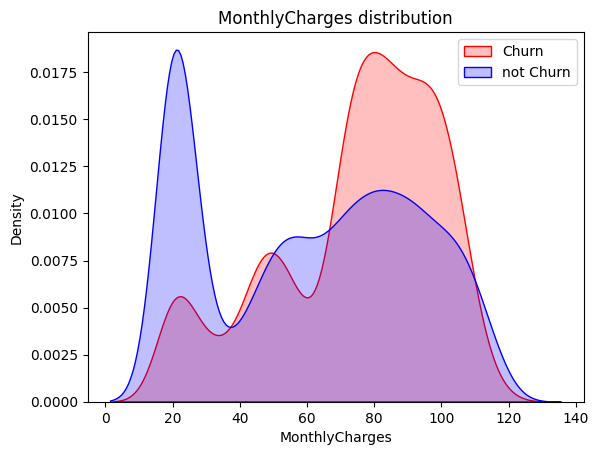

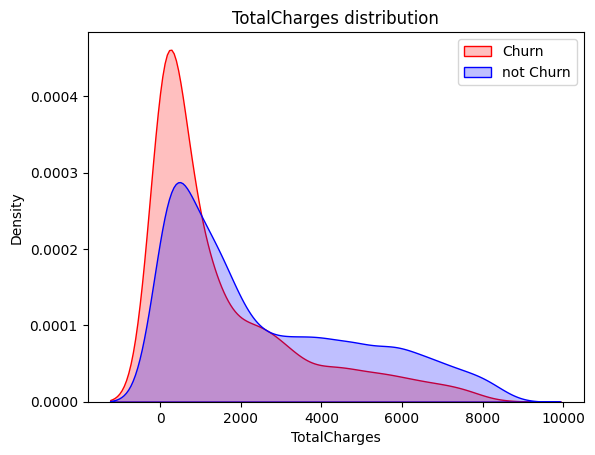

In [192]:
for col in num_cols:
    sns.kdeplot(df[df['Churn'] == 'Yes'][col], color= 'red', fill=True, label = "Churn")
    sns.kdeplot(df[df['Churn'] == 'No'][col], color= 'blue', fill=True, label = "not Churn")
    plt.title(f"{col} distribution")
    plt.legend()
    plt.show()